# LOSS AND ERROR RATE ON CIFAR -- SOLUTION

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### Download the CIFAR dataset -- check the size carefully!

In [2]:
train_data=torch.load('../../data/cifar/data/train_data.pt')
train_label=torch.load('../../data/cifar/data/train_label.pt')
test_data=torch.load('../../data/cifar/data/test_data.pt')

print(train_data.size())

torch.Size([50000, 3, 32, 32])


### Make a ONE layer net class. 

In [3]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        self.linear_layer = nn.Linear( input_size, output_size , bias=True)
        
    def forward(self, x):
        scores = self.linear_layer(x)
        return scores

### Build the net. 

### We are dealing with RGB pictures that are 3 x 32 x 32 

### On picture contains a total of 3 x 32 x 32 = 3072 values

In [4]:
net=one_layer_net(3072,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=3072, out_features=10, bias=True)
)


### Choose the criterion and optimizer. Also choose:

### batchsize = 20

### learning rate = 0.01

In [5]:
criterion = nn.CrossEntropyLoss()

optimizer=torch.optim.SGD( net.parameters() , lr=0.01 )

bs=20

### Do 50 passes through the training set (which contains 50,000 images -- not 60,000 like mnist!)

In [6]:
for epoch in range(50):
    
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(50000)
 
    for count in range(0,50000,bs):
    
        # Set the gradients to zeros
        optimizer.zero_grad()
        
        # create a minibatch       
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        # reshape the minibatch
        inputs = minibatch_data.view(bs,3072)

        # tell Pytorch to start tracking all operations that will be done on "inputs"
        inputs.requires_grad_()

        # forward the minibatch through the net 
        scores=net( inputs ) 

        # Compute the average of the losses of the data points in the minibatch
        loss =  criterion( scores , minibatch_label) 
        
        # backward pass to compute dL/dU, dL/dV and dL/dW   
        loss.backward()

        # do one step of stochastic gradient descent: U=U-lr(dL/dU), V=V-lr(dL/dU), ...
        optimizer.step()
        
        # START COMPUTING STATS
        
        num_batches+=1
        
        with torch.no_grad():
        
            # add the loss of this batch to the running loss
            running_loss += loss.item()

            # compute the error made on this batch and add it to the running error       
            error = utils.get_error( scores , minibatch_label)
            running_error += error.item()
        

    
    
    # compute stats for the full training set
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    
    print('epoch=',epoch, '\t loss=', total_loss , '\t error=', total_error*100 ,'percent')
        
    
        
        

epoch= 0 	 loss= 1.961263083934784 	 error= 69.9819999408722 percent
epoch= 1 	 loss= 1.8607673372268676 	 error= 65.07399996042251 percent
epoch= 2 	 loss= 1.8325677770137787 	 error= 64.15599993944167 percent
epoch= 3 	 loss= 1.8207026695251465 	 error= 63.49999999761582 percent
epoch= 4 	 loss= 1.8061849982738496 	 error= 62.82999998092651 percent
epoch= 5 	 loss= 1.7987304209709167 	 error= 62.58400000810623 percent
epoch= 6 	 loss= 1.7908356945037842 	 error= 61.987999973297114 percent
epoch= 7 	 loss= 1.7815663630008698 	 error= 61.655999956130984 percent
epoch= 8 	 loss= 1.7750649393558502 	 error= 61.524000034332275 percent
epoch= 9 	 loss= 1.7722051088809967 	 error= 61.29200002908707 percent
epoch= 10 	 loss= 1.7690504139184953 	 error= 61.1080000114441 percent
epoch= 11 	 loss= 1.7612760514259338 	 error= 60.76600004434586 percent
epoch= 12 	 loss= 1.759373460817337 	 error= 60.773999977111814 percent
epoch= 13 	 loss= 1.7589800609111785 	 error= 60.82799995660781 percent
ep

### Choose image at random from the test set and see how good/bad are the predictions

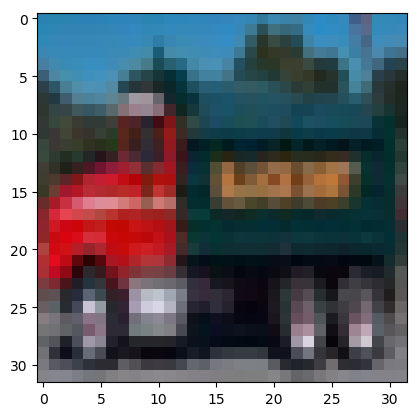

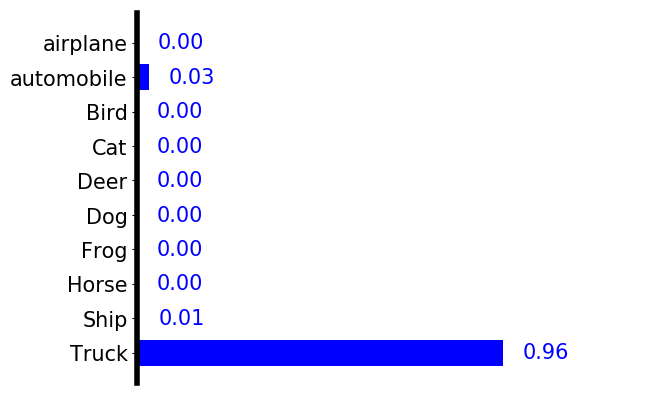

In [9]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores =  net( im.view(1,3072)) 
probs= F.softmax(scores, dim=1)
utils.show_prob_cifar(probs)